<a href="https://colab.research.google.com/github/joyaldesai/DEEP-LEARNING-NLP-Project/blob/main/%5B4%5D_Customer_Churn_ANN_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the dependancy**

In [4]:
# import the dependancy
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Deep Learning With NLP/CSV of Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


**so the data is highlly imbalenced**

In [11]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# Drop few columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
# get some dummy columns
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


## **Train test split**

In [17]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [18]:
x = df.drop(columns=['Exited'])
y = df['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)
print('\nDataset After:',y_train_smt.value_counts())


Dataset After: Exited
0    6356
1    6356
Name: count, dtype: int64


In [20]:
scaler = StandardScaler()
x_train_trf = scaler.fit_transform(x_train_smt)
x_test_trf = scaler.transform(x_test)

## **making nural network**

In [21]:
x_test_trf.shape

(2000, 11)

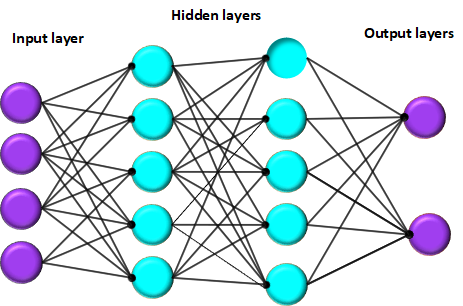

In [22]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11,kernel_regularizer=l2(l2=0.01))) # Input Layer
model.add(Dense(11,activation='relu'))   # Hidden
model.add(Dense(22,activation='relu'))   # Hidden
model.add(Dense(33,activation='relu'))   # Hidden
model.add(Dense(33,activation='relu'))   # Hidden
model.add(Dense(22,activation='relu'))   # Hidden
model.add(Dense(11,activation='relu'))   # Hidden
model.add(Dense(1,activation='sigmoid'))    # output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


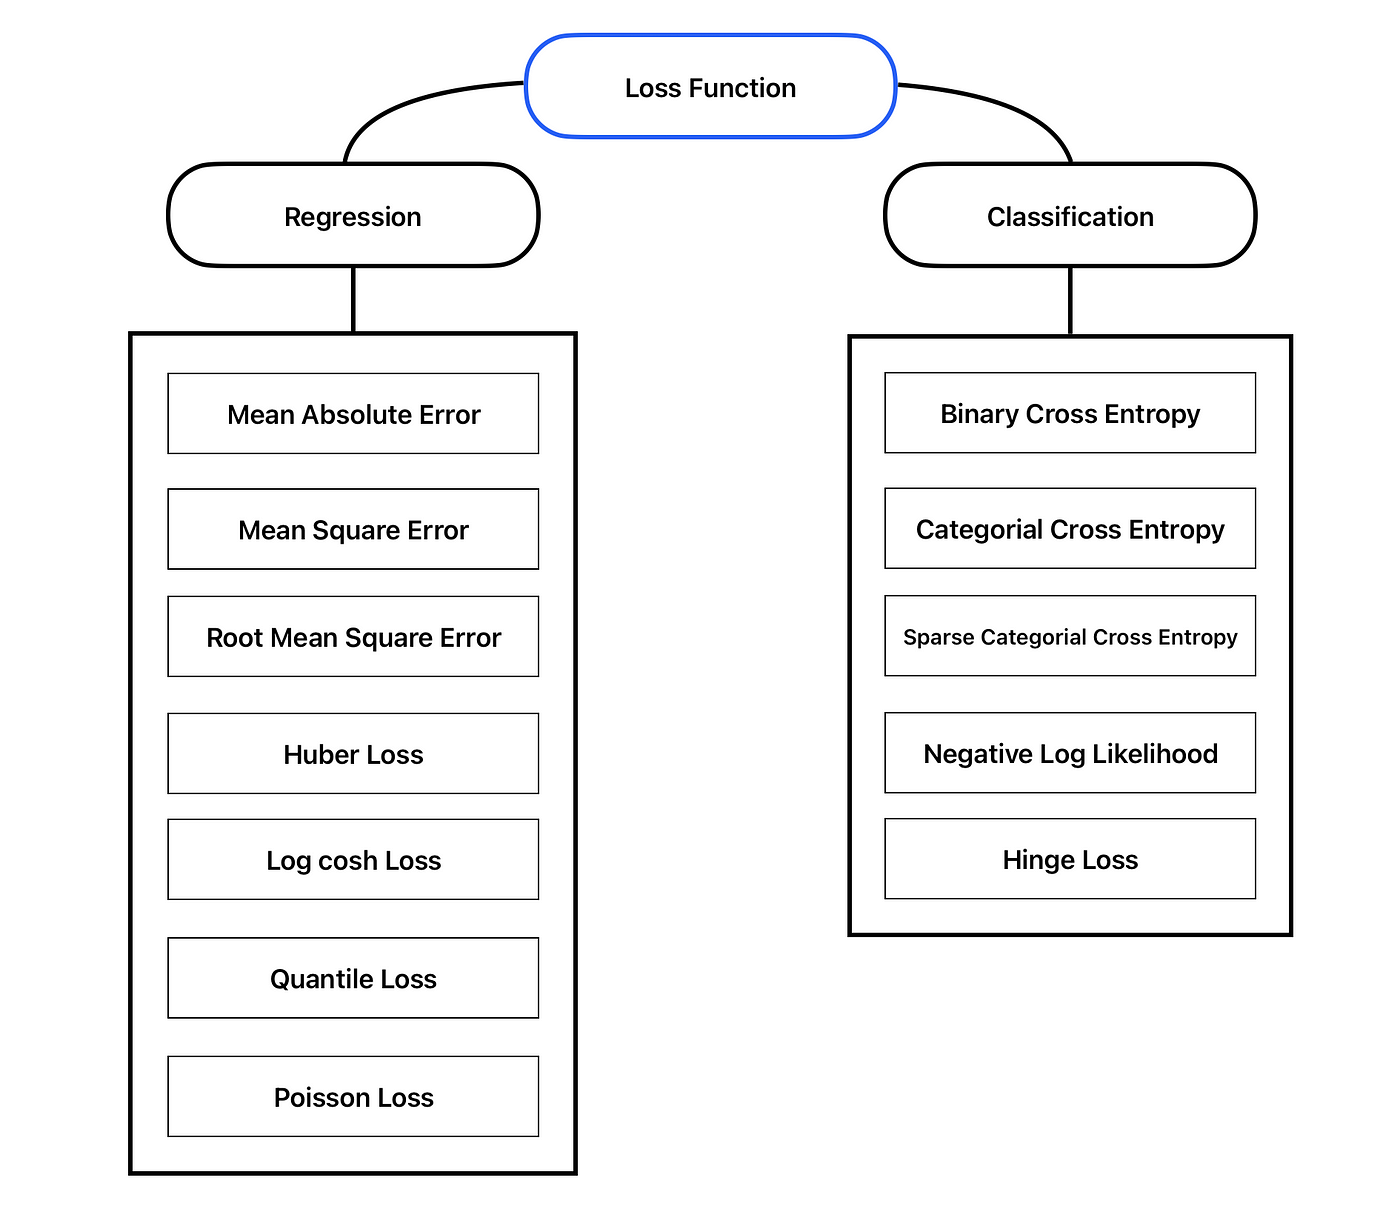

In [23]:
# model compliation
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train_trf,y_train_smt,epochs=100,validation_split=0.2,batch_size=100)

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6014 - loss: 0.7690 - val_accuracy: 0.5088 - val_loss: 0.9336
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7314 - loss: 0.6315 - val_accuracy: 0.6732 - val_loss: 0.7525
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7720 - loss: 0.5513 - val_accuracy: 0.7354 - val_loss: 0.5571
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7814 - loss: 0.5118 - val_accuracy: 0.8211 - val_loss: 0.4147
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8074 - loss: 0.4682 - val_accuracy: 0.7928 - val_loss: 0.4510
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8170 - loss: 0.4493 - val_accuracy: 0.8132 - val_loss: 0.4062
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8191 - loss: 0.4394 - val_accuracy: 0.8160 - val_loss: 0.4069
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8270 - loss: 0.4203 - val_acc

In [25]:
train_pred = model.predict(x_train_trf)
train_pred = np.where(train_pred>0.5,1,0)
train_pred

398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [26]:
test_pred = model.predict(x_test_trf)
test_pred = np.where(test_pred>0.5,1,0)
test_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [27]:
# check the accuracy score
from sklearn.metrics import accuracy_score
print('Train accuracy :- ', accuracy_score(y_train_smt,train_pred))
print('test accuracy :- ', accuracy_score(y_test, test_pred))

Train accuracy :-  0.8427470106985525
test accuracy :-  0.84


### Building a Predictive System
To build a predictive system, you can create a function that takes the input features as a NumPy array, scales the features, and then uses the trained model to make a prediction. Here is an example:

In [31]:
def predict_churn(model, scaler, input_data):
  """
  Predicts churn for a given input data.

  Args:
    model: The trained Keras model.
    scaler: The StandardScaler object used for training.
    input_data: A NumPy array of input features.

  Returns:
    A prediction of 0 (no churn) or 1 (churn).
  """
  input_data_reshaped = input_data.reshape(1, -1)
  input_data_scaled = scaler.transform(input_data_reshaped)
  prediction = model.predict(input_data_scaled)
  return np.where(prediction > 0.5, 1, 0)[0][0]

# Example usage:
# Let's take the first row of the test set as an example
sample_input = x_test.iloc[0].values
prediction = predict_churn(model, scaler, sample_input)
print(f"Prediction for the sample input: {prediction}")
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for the sample input: 0
The customer is not likely to churn.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Saving the Model
You can use the `pickle` library to save your trained model and the scaler object.

In [32]:
import pickle

# Save the model
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Create a prediction function


In [40]:
import pickle

# Load the model and scaler
with open('churn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

def predict_churn_from_input(input_data):
  """
  Predicts churn for a given single row of data.

  Args:
    input_data: A pandas Series or dictionary representing a single customer.

  Returns:
    A prediction of 0 (no churn) or 1 (churn).
  """
  # Convert input to a DataFrame
  input_df = pd.DataFrame([input_data])

  # One-hot encode categorical features
  input_df = pd.get_dummies(input_df, columns=['Geography', 'Gender'], drop_first=True)

  # Align columns with the training data
  # Get the column order from the training data
  training_columns = x_train.columns

  # Reindex the input DataFrame to match the training data columns
  input_df = input_df.reindex(columns=training_columns, fill_value=0)

  # Scale the input data
  input_data_scaled = loaded_scaler.transform(input_df)

  # Make a prediction
  prediction = loaded_model.predict(input_data_scaled)

  return np.where(prediction > 0.5, 1, 0)[0][0]

# Example usage with the first row of x_test
sample_input_dict = x_test.iloc[0].to_dict()

# Since the x_test is already one hot encoded, we need to reconstruct the original format for testing the function
sample_input_for_prediction = {
    'CreditScore': 608,
    'Geography': 'Spain',
    'Gender': 'Female',
    'Age': 41,
    'Tenure': 1,
    'Balance': 83807,
    'NumOfProducts': 1,
    'HasCrCard': 0,
    'IsActiveMember': 1,
    'EstimatedSalary': 112542.88
}


prediction = predict_churn_from_input(sample_input_for_prediction)

print(f"Prediction for the sample input: {prediction}")
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction for the sample input: 0
The customer is not likely to churn.
